In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

from src.loading import get_dataset_and_order_function
from src.execution import compute_cuts, compute_tangles, order_cuts, compute_clusters, compute_evaluation
from src.config import load_validate_settings, VALID_PREPROCESSING

args = load_validate_settings('./')
# args.dataset.name = 'knn'

print("Load data\n", flush=True)
xs, ys, G, order_function = get_dataset_and_order_function(args.dataset, args.seed)
nx.is_connected(G)

Load data



True

In [9]:
cuts = dict()
orders = dict()
times = dict()

names = ['kneip', 'local_min', 'kernighan_lin', 'local_min_bounded', 'random']
for name in names:
    print(f"Find cuts using {name}", flush=True)
    if name == 'kernighan_lin':
        args.preprocessing.name = ['karnig_lin']
    else:
        args.preprocessing.name = [name]
    start = time.time()
    all_cuts = compute_cuts(xs.copy(), args.preprocessing)
    
    print("Compute order", flush=True)
    all_cuts, all_orders = order_cuts(all_cuts, order_function)
    
    max_order = np.int(np.ceil(np.max(all_orders)))
    min_order = np.int(np.floor(np.min(all_orders)))
    print(f"\tOrder range: {min_order}--{max_order} \n", flush=True)
    
    cuts[name] = all_cuts
    orders[name] = all_orders
    times[name] = time.time() - start

Find cuts using kneip
kneip
		 I've found 19 cuts so far
		 I've found 41 cuts so far
		 I've found 56 cuts so far
		 I've found 72 cuts so far
		 I've found 84 cuts so far
		 I've found 101 cuts so far
		 I've found 114 cuts so far
		 I've found 131 cuts so far
		 I've found 152 cuts so far
		 I've found 168 cuts so far
		 I've found 189 cuts so far
		 I've found 211 cuts so far
		 I've found 228 cuts so far
		 I've found 244 cuts so far
		 I've found 263 cuts so far
		 I've found 284 cuts so far
		 I've found 305 cuts so far
		 I've found 325 cuts so far
		 I've found 345 cuts so far
		 I've found 362 cuts so far
		 I've found 381 cuts so far
		 I've found 400 cuts so far
		 I've found 412 cuts so far
		 I've found 428 cuts so far
		 I've found 443 cuts so far
		 I've found 453 cuts so far
		 I've found 469 cuts so far
		 I've found 479 cuts so far
		 I've found 492 cuts so far
		 I've found 512 cuts so far
Compute order
	Order range: 4--285 

Find cuts using local_min_bounded
local_

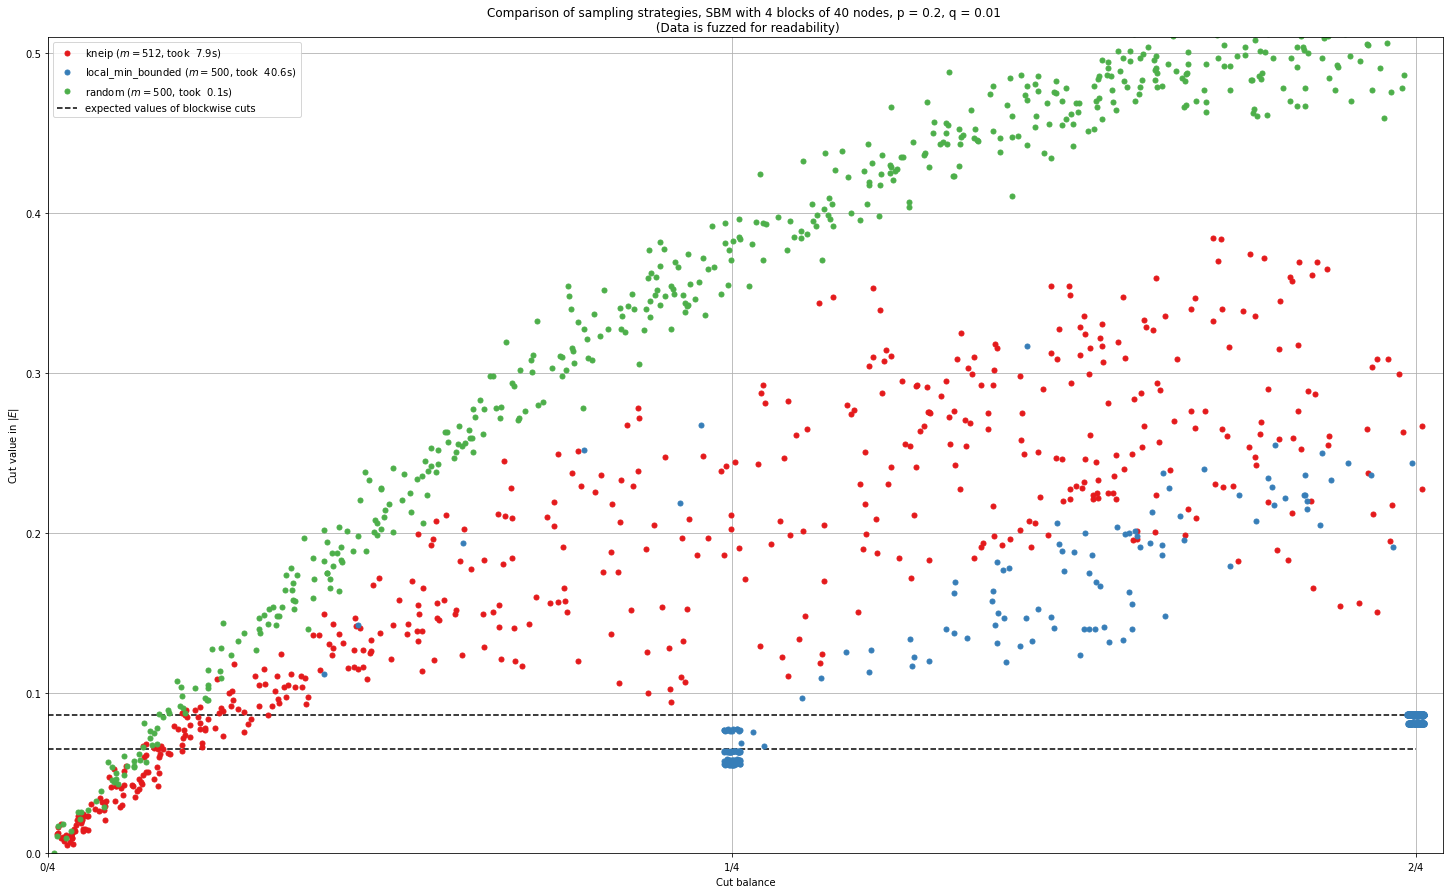

In [17]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(25,15))
cmap = plt.cm.get_cmap('Set1')

for i, name in enumerate(names):
    balance = 0.5 - np.abs(cuts[name].sum(axis=1) / len(G) - 0.5)
    order = orders[name] / len(G.edges)
    xfuzz = (np.random.rand(*balance.shape) - .5) * (1 / len(G))
    yfuzz = (np.random.rand(*balance.shape) - .5) * 0.001
    
    color = np.array(cmap(i))
    
    ax.plot(balance + xfuzz, order + yfuzz, marker='.', ms=10, linestyle='', label=f'{name} ($m={len(order)}$, took {times[name] : .1f}s)', color=color)
ax.set(xlabel='Cut balance', ylabel='Cut value in $|E|$')

N = len(G)
nb, p, q = args.dataset.sbm.nb_blocks, args.dataset.sbm.p, args.dataset.sbm.q

ax.hlines([(i*N/nb) * (N - i*N/nb) * q / len(G.edges) for i in range(1, 1 + nb//2)], 0, 0.5, linestyles='dashed', label='expected values of blockwise cuts')

plt.setp(ax, xticks=[i / nb for i in range(1 + nb // 2)] + ([0.5] if nb % 2 == 1 else []),
        xticklabels=[f'${i}/{nb}$' for i in range(1 + nb // 2)] + (['1/2'] if nb % 2 == 1 else []),
        xlim=(0, 0.51), ylim=(0,0.51))

ax.grid(True)
ax.legend()
if args.dataset.name == 'sbm':
    ax.set_title(f'Comparison of sampling strategies, SBM with {nb} blocks of {N//nb} nodes, p = {p}, q = {q} \n (Data is fuzzed for readability)')
    fig.savefig(f'sbm{nb}blocks{N}nodes{p}p{q}q.png')
plt.show(fig)

1

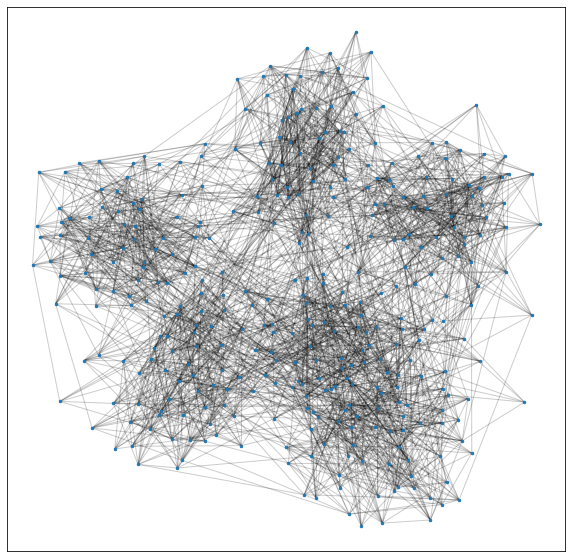

In [4]:
fig, ax = plt.subplots(figsize=(10,10))

pos = nx.spectral_layout(G)
pos = nx.spring_layout(G, pos=pos)
nx.draw_networkx(G, pos=pos, node_size=6, ax=ax, edge_color='#00000033', labels={})
len(list(nx.connected_components(G)))

In [12]:
t = times['random']

In [21]:
args?

Type:        SimpleNamespace
String form: namespace(algorithm=namespace(agreement=10, name='core'), dataset=namespace(knn=namespace(block_s <...> me=['random'], random=namespace(nb_cuts=500)), seed=21, tangles=namespace(percentage_orders=100))
File:        /usr/lib/python3.8/types.py
Docstring:  
A simple attribute-based namespace.

SimpleNamespace(**kwargs)


In [22]:
from types import SimpleNamespace

In [23]:
import copy

In [24]:
copy.deepcopy(args)

namespace(algorithm=namespace(agreement=10, name='core'), dataset=namespace(knn=namespace(block_size=10, k=5, mus=[[0, 0], [0, 2]], nb_blocks=2, vars=[[1, 1], [1, 1]]), multilevel=namespace(block_size=[20, 10], p_in=[0.5, 1], p_out=0.05), name='sbm', path='datasets/big5.csv', q_syn=namespace(n_features=30, n_mindsets=5, n_samples=100, tolerance=0.1), roc=namespace(clique_size=10, nb_cliques=20), sbm=namespace(block_size=40, nb_blocks=4, p=0.2, q=0.01), type='graph'), experiment=namespace(type='single'), output=namespace(dir='output', tolerance_predictions=0.8), plot=namespace(cuts=True, nb_cuts=10, tangles=True), preprocessing=namespace(karnig_lin=namespace(fractions=[2, 2.5, 3.3, 5, 10], nb_cuts=100), kmodes=namespace(max_nb_clusters=10), kneip=namespace(nb_cuts=500), local_min=namespace(nb_cuts=500), name=['random'], random=namespace(nb_cuts=500)), seed=21, tangles=namespace(percentage_orders=100))

In [25]:
np.round(2.0)

2.0